In [47]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

# Motivating pendulum

In [5]:
results_df = pd.read_pickle('pendulum_motivating_mlp_results.pkl')

In [57]:
results_extra_df = pd.read_pickle('pendulum_motivating_mlp_results_extra_tdata.pkl')

In [6]:
results_df

,iteration,losses,masses,setting,test_mse,test_reward
0,0,"[0.053429024270549415, 0.0008709549851482735, ...","[0.5176792226354104, 0.2261561738963349, 0.881...",blind_fixed_1000g_mass,0.097293,"[-99.70960347308527, -122.4129649717534, -138...."
1,1,"[0.06907340570469386, 0.0008153427688055672, 0...","[0.5176792226354104, 0.2261561738963349, 0.881...",blind_fixed_1000g_mass,0.121222,"[-99.41841275267957, -119.55290992458718, -139..."
2,2,"[0.0703857848858228, 0.0011437718286761082, 0....","[0.5176792226354104, 0.2261561738963349, 0.881...",blind_fixed_1000g_mass,0.132080,"[-100.66950320944603, -121.70168009339429, -14..."
3,3,"[0.06511729544983245, 0.0011841030152980239, 0...","[0.5176792226354104, 0.2261561738963349, 0.881...",blind_fixed_1000g_mass,0.111909,"[-100.19542610804159, -119.67337294430799, -13..."
4,4,"[0.056571276876796035, 0.0009208337612450123, ...","[0.5176792226354104, 0.2261561738963349, 0.881...",blind_fixed_1000g_mass,0.112291,"[-99.74299862466374, -124.67448001177131, -138..."
5,0,"[0.04849011541537475, 0.0008986205696710386, 0...","[0.5176792226354104, 0.2261561738963349, 0.881...",blind_fixed_300g_mass,0.082263,"[-241.25973538596932, -33.025570788773834, -64..."
6,1,"[0.06735313529588748, 0.0012245588312856852, 0...","[0.5176792226354104, 0.2261561738963349, 0.881...",blind_fixed_300g_mass,0.087450,"[-99.11754281066013, -27.029531699220186, -274..."
7,2,"[0.05052543540301267, 0.0010520659187110142, 0...","[0.5176792226354104, 0.2261561738963349, 0.881...",blind_fixed_300g_mass,0.083584,"[-99.34395457662752, -28.503814471410166, -638..."
8,3,"[0.05413916429602541, 0.001061813205416547, 0....","[0.5176792226354104, 0.2261561738963349, 0.881...",blind_fixed_300g_mass,0.080703,"[-99.40490357733299, -27.343492736570848, -391..."
9,4,"[0.0692184250636492, 0.0012254924099775963, 0....","[0.5176792226354104, 0.2261561738963349, 0.881...",blind_fixed_300g_mass,0.075199,"[-98.31960497105004, -27.940260224523286, -263..."


In [18]:
d = {'mass': np.concatenate(results_df.masses.tolist()), 'reward': np.concatenate(results_df.test_reward.tolist()),
     'setting': np.repeat(results_df.setting.tolist(), 50)}
proper_df = pd.DataFrame(d)

In [59]:
d = {'mass': np.concatenate(results_extra_df.masses.tolist()), 'reward': np.concatenate(results_extra_df.test_reward.tolist()),
     'setting': np.repeat(results_extra_df.setting.tolist(), 50)}
proper_extra_df = pd.DataFrame(d)

In [48]:
plt.figure()
for setting in results_df.setting.unique():
    sub_df = results_df[results_df.setting == setting]
    masses = np.concatenate(sub_df.masses.tolist())
    test_reward = np.concatenate(sub_df.test_reward.tolist())
#    plt.scatter(masses, test_reward, label=setting)
    sns.jointplot(data=pd.DataFrame({'m': masses, 'r': test_reward}), x='m', y='r')
plt.legend()
plt.show()

NameError: name 'results_df' is not defined

<Figure size 432x288 with 0 Axes>

<IPython.core.display.Javascript object>


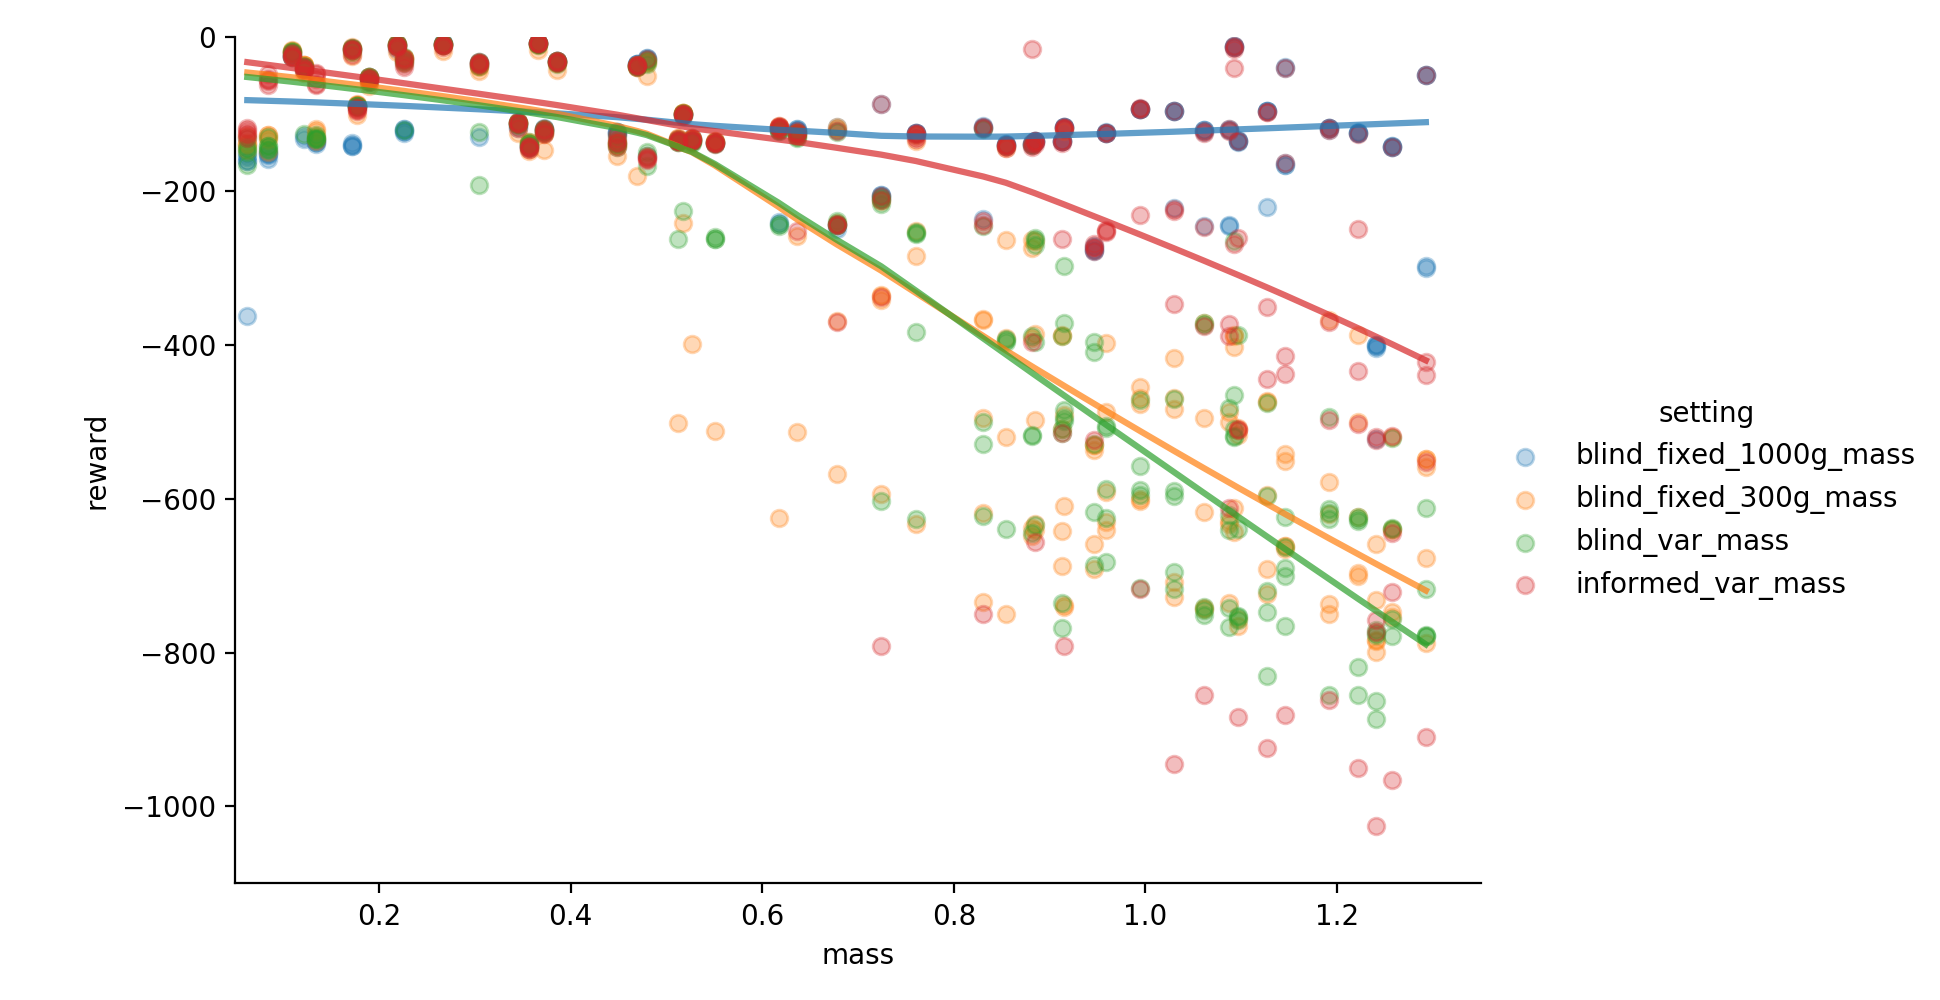

(-1100, 0)

In [55]:
#g = sns.jointplot(data=proper_df[proper_df.setting == 'blind_fixed_1000g_mass'], x='mass', y='reward', kind='reg', )
g = sns.lmplot(data=proper_df[proper_df.setting != 'blind_fixed_ds_mean_mass'], x='mass', y='reward', hue='setting',
               aspect=1.5, lowess=True, scatter_kws={'alpha': 0.3}, line_kws={'alpha': 0.7})
plt.xlim(0.05, 1.35)
plt.ylim(-1100, 0)
#g.plot_joint(sns.regplot())
#g.ax_marg_x.set_axis_off()
#g.ax_marg_y.set_axis_off()

<IPython.core.display.Javascript object>


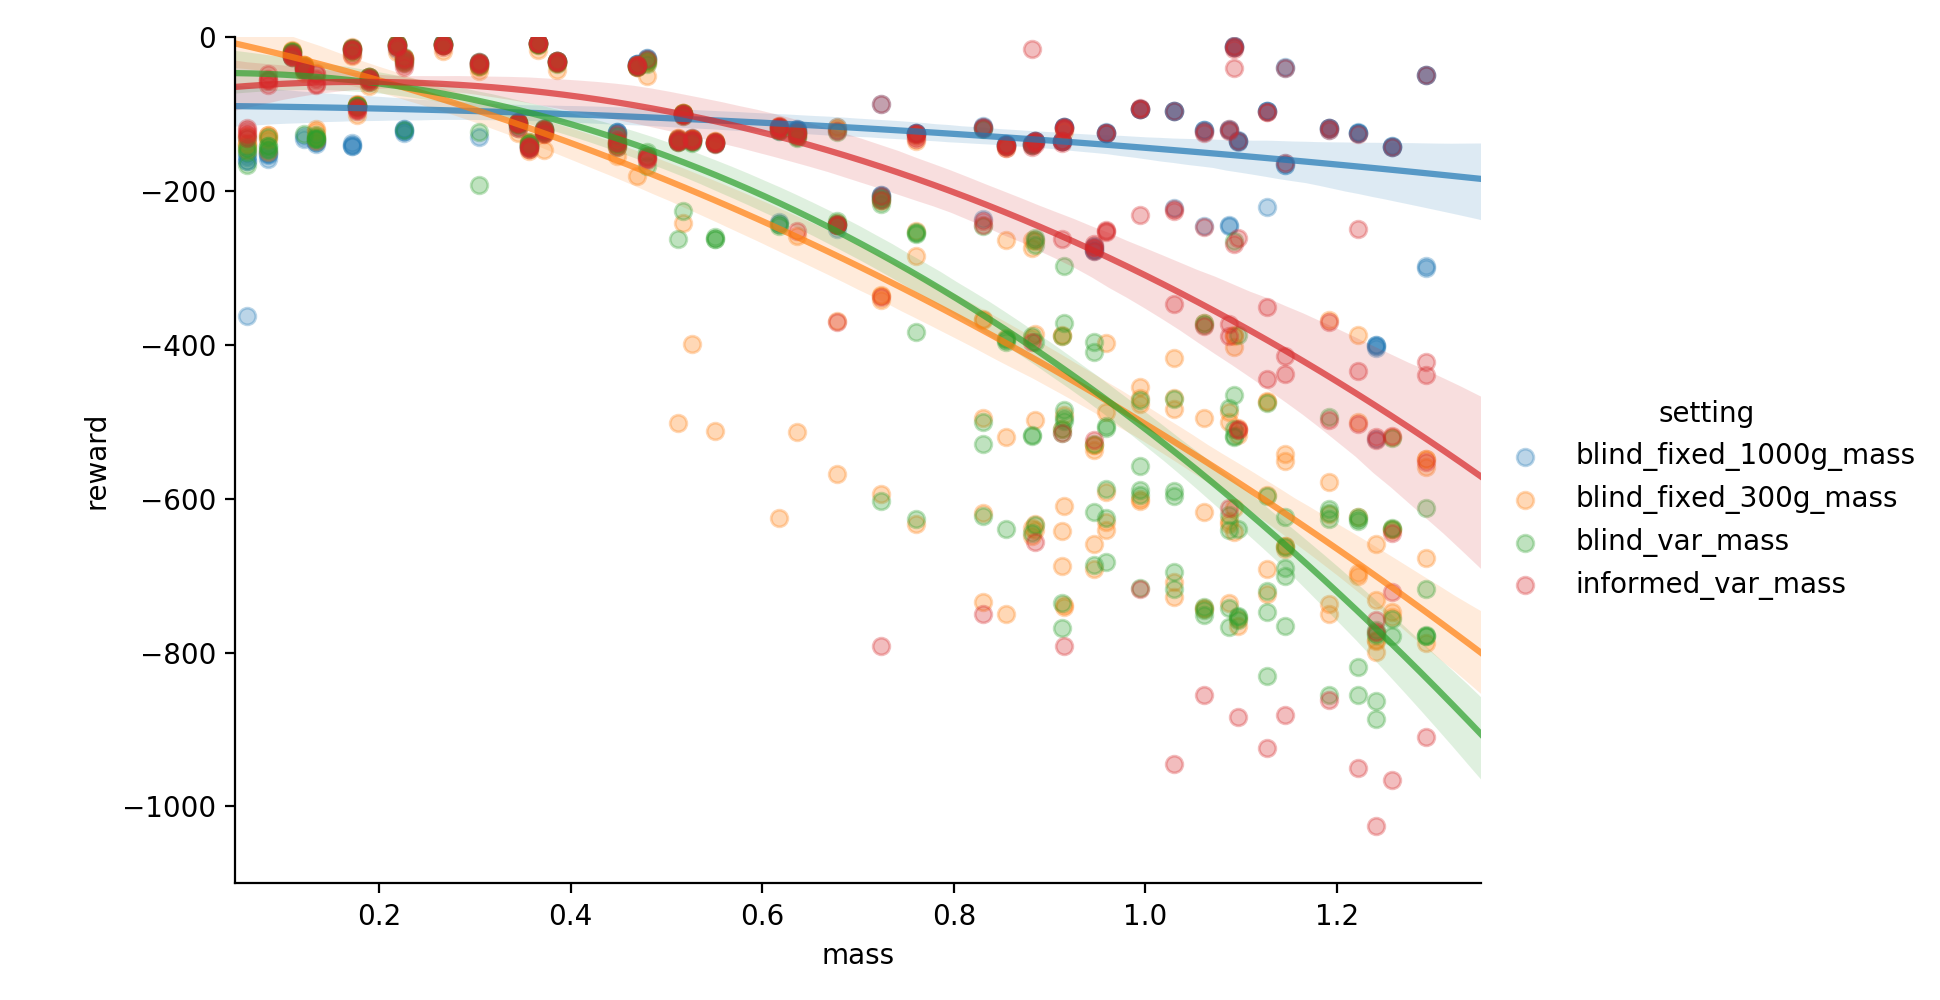

/Users/dominik/Documents/Uni_Master/Courses/3.Semester/ProjectCourse/venv/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(-1100, 0)

In [56]:
#g = sns.jointplot(data=proper_df[proper_df.setting == 'blind_fixed_1000g_mass'], x='mass', y='reward', kind='reg', )
g = sns.lmplot(data=proper_df[proper_df.setting != 'blind_fixed_ds_mean_mass'], x='mass', y='reward', hue='setting',
               aspect=1.5, order=2, scatter_kws={'alpha': 0.3}, line_kws={'alpha': 0.7})
plt.xlim(0.05, 1.35)
plt.ylim(-1100, 0)
#g.plot_joint(sns.regplot())
#g.ax_marg_x.set_axis_off()
#g.ax_marg_y.set_axis_off()

<IPython.core.display.Javascript object>


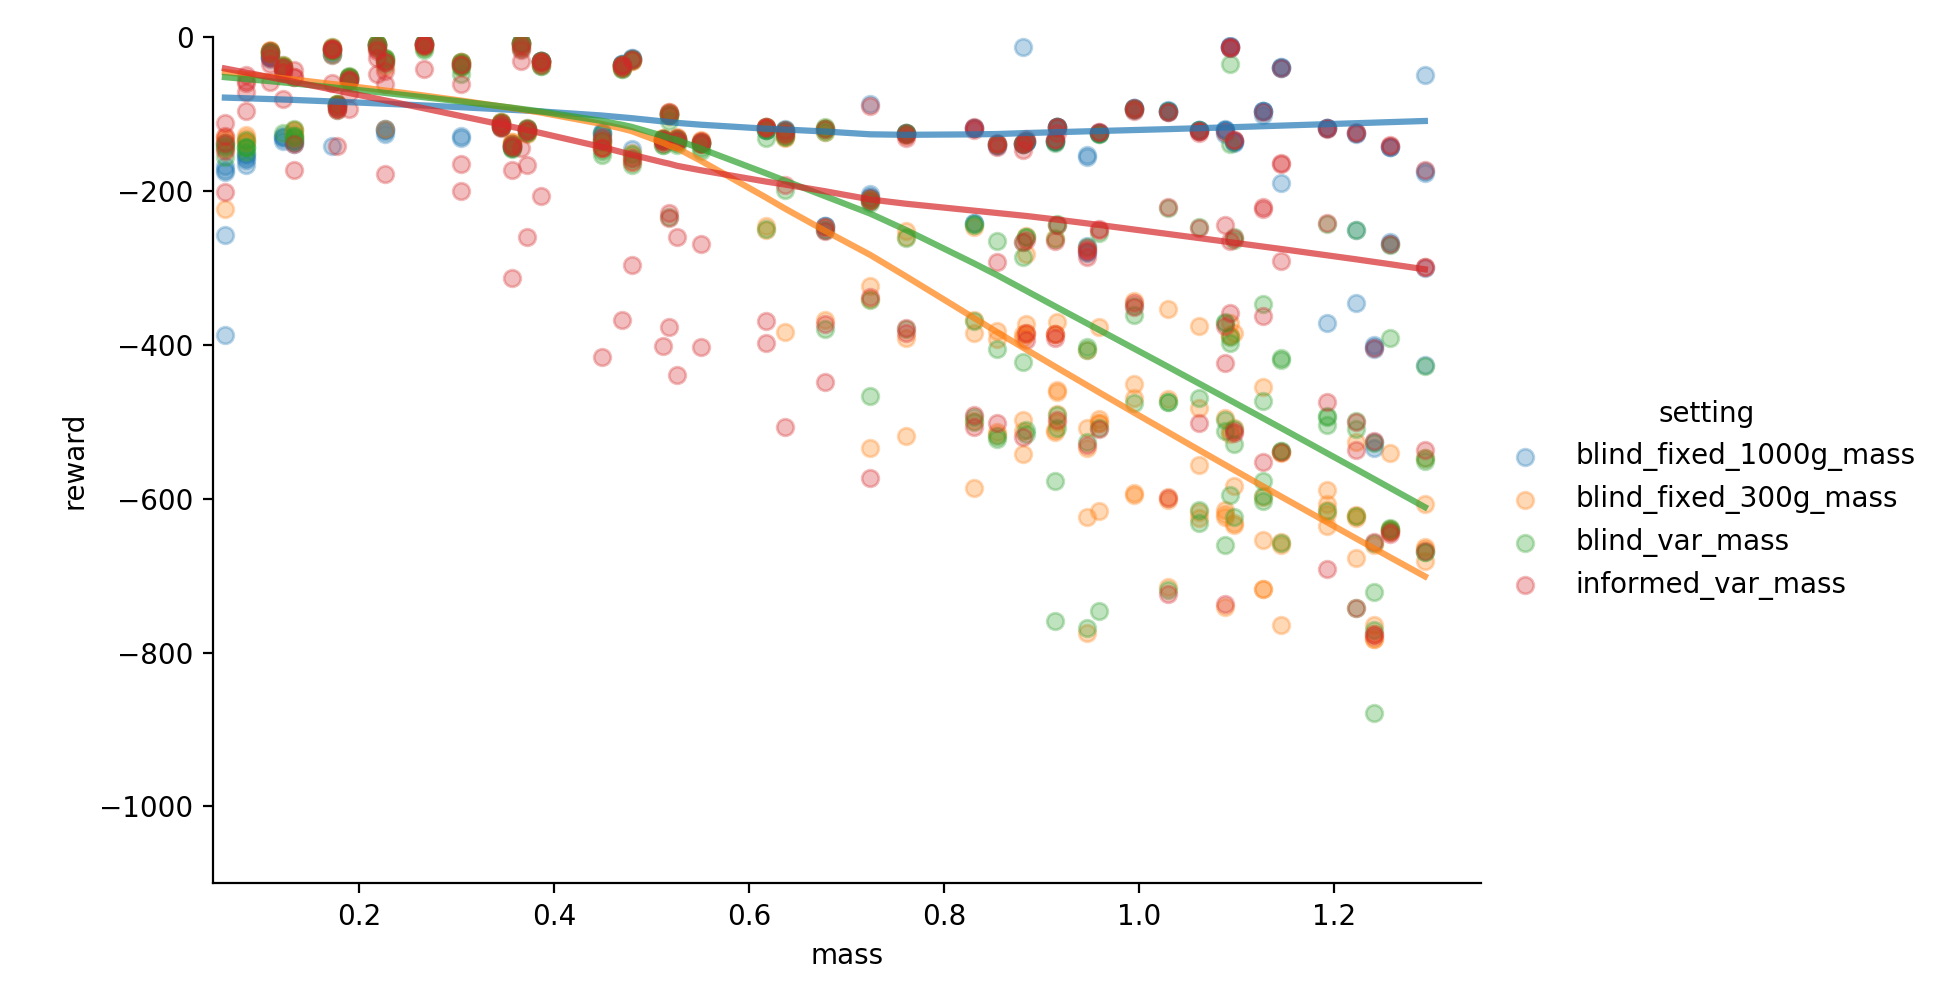

(-1100, 0)

In [60]:
#g = sns.jointplot(data=proper_df[proper_df.setting == 'blind_fixed_1000g_mass'], x='mass', y='reward', kind='reg', )
g = sns.lmplot(data=proper_extra_df[proper_extra_df.setting != 'blind_fixed_ds_mean_mass'], x='mass', y='reward', hue='setting',
               aspect=1.5, lowess=True, scatter_kws={'alpha': 0.3}, line_kws={'alpha': 0.7})
plt.xlim(0.05, 1.35)
plt.ylim(-1100, 0)
#g.plot_joint(sns.regplot())
#g.ax_marg_x.set_axis_off()
#g.ax_marg_y.set_axis_off()

<IPython.core.display.Javascript object>


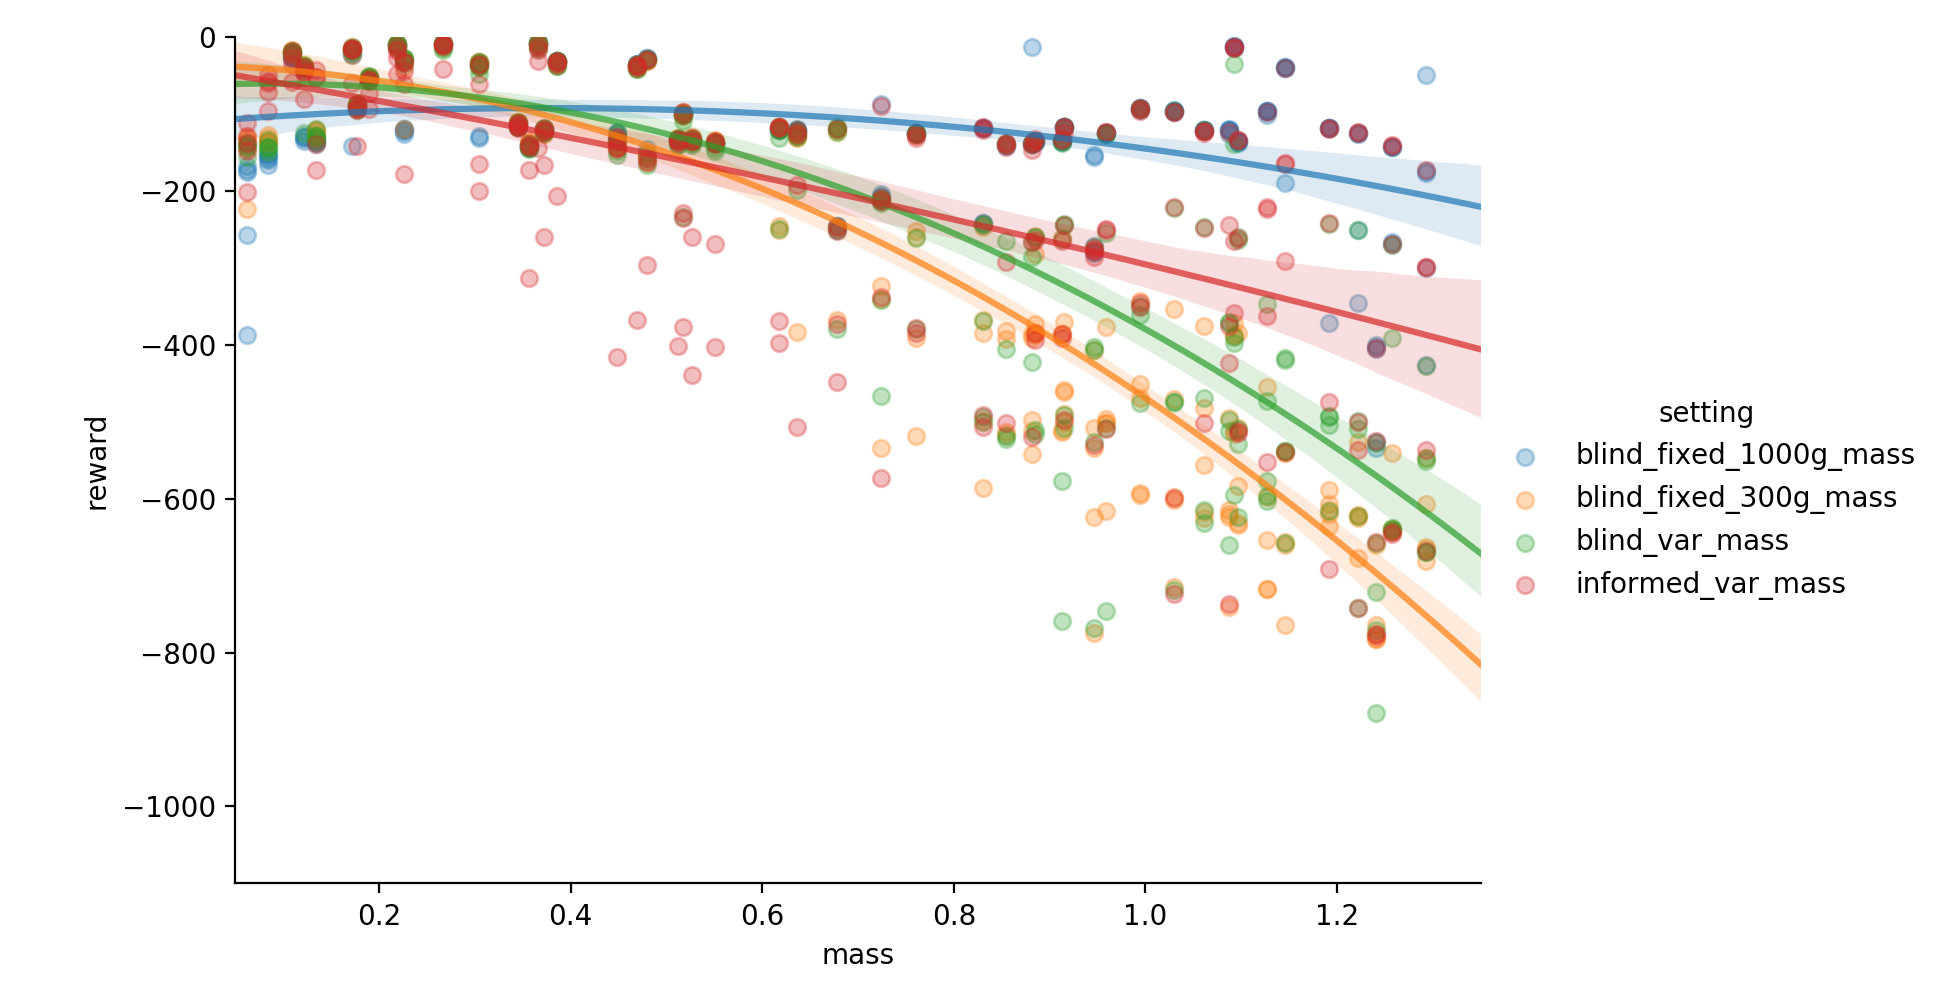

/Users/dominik/Documents/Uni_Master/Courses/3.Semester/ProjectCourse/venv/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(-1100, 0)

In [61]:
#g = sns.jointplot(data=proper_df[proper_df.setting == 'blind_fixed_1000g_mass'], x='mass', y='reward', kind='reg', )
g = sns.lmplot(data=proper_extra_df[proper_extra_df.setting != 'blind_fixed_ds_mean_mass'], x='mass', y='reward', hue='setting',
               aspect=1.5, order=2, scatter_kws={'alpha': 0.3}, line_kws={'alpha': 0.7})
plt.xlim(0.05, 1.35)
plt.ylim(-1100, 0)
#g.plot_joint(sns.regplot())
#g.ax_marg_x.set_axis_off()
#g.ax_marg_y.set_axis_off()

# Pipeline

In [12]:
result_df = pd.read_pickle('pipeline_pendulum_exp1_100reps.pkl')

In [13]:
result_df

,pendulum_length,real_mass,repetition,reward,step,visual_mass
0,0.40,0.05,0,-0.137851,0,0.05
1,0.40,0.05,0,-0.352803,1,0.05
2,0.40,0.05,0,-0.201357,2,0.05
3,0.40,0.05,0,-0.147332,3,0.05
4,0.40,0.05,0,-0.602566,4,0.05
5,0.40,0.05,0,-0.633499,5,0.05
6,0.40,0.05,0,-0.825711,6,0.05
7,0.40,0.05,0,-0.337723,7,0.05
8,0.40,0.05,0,-0.257269,8,0.05
9,0.40,0.05,0,-0.425642,9,0.05


In [51]:
grouped = result_df.groupby(['real_mass', 'visual_mass', 'repetition']).sum()
grouped = grouped.groupby(['real_mass', 'visual_mass']).agg(['mean', 'std'])
grouped = grouped.reset_index()
grouped

real_mass visual_mass pendulum_length           reward               step  \
                                    mean  std        mean         std   mean   
0     0.0500      0.0500           80.00  0.0 -148.708457   53.459215  19900   
1     0.0500      0.3625          106.75  0.0 -357.316865  131.337093  19900   
2     0.0500      0.6750          150.50  0.0 -761.578615  208.997449  19900   
3     0.0500      0.9875          194.25  0.0 -754.325288  199.498768  19900   
4     0.0500      1.3000          238.00  0.0 -893.861261  171.417454  19900   
5     0.3625      0.0500           80.00  0.0 -695.289564   77.763319  19900   
6     0.3625      0.3625          106.75  0.0 -121.952250   80.322840  19900   
7     0.3625      0.6750          150.50  0.0 -129.270552   91.077098  19900   
8     0.3625      0.9875          194.25  0.0 -131.701683  103.020080  19900   
9     0.3625      1.3000          238.00  0.0 -157.587320  131.042240  19900   
10    0.6750      0.0500           80.00  0.0 -911.129827   84.253947  19900   
11    0.6750      0.3625          106.75  0.0 -583.563967  154.341146  19900   
12    0.6750      0.6750          150.50  0.0 -231.115861  202.542187  19900   
13    0.6750      0.9875          194.25  0.0 -467.810473  315.351591  19900   
14    0.6750      1.3000          238.00  0.0 -574.791405  405.226538  19900   
15    0.9875      0.0500           80.00  0.0 -964.790150  104.268833  19900   
16    0.9875      0.3625          106.75  0.0 -828.201691  151.638544  19900   
17    0.9875      0.6750          150.50  0.0 -530.081964  265.769647  19900   
18    0.9875      0.9875          194.25  0.0 -631.270202  323.129633  19900   
19    0.9875      1.3000          238.00  0.0 -708.278681  350.508160  19900   
20    1.3000      0.0500           80.00  0.0 -973.035225  102.949535  19900   
21    1.3000      0.3625          106.75  0.0 -893.761111  146.289961  19900   
22    1.3000      0.6750          150.50  0.0 -758.555470  183.557504  19900   
23    1.3000      0.9875          194.25  0.0 -675.257803  347.206857  19900   
24    1.3000      1.3000          238.00  0.0 -724.880638  358.389589  19900   

         
    std  
0   0.0  
1   0.0  
2   0.0  
3   0.0  
4   0.0  
5   0.0  
6   0.0  
7   0.0  
8   0.0  
9   0.0  
10  0.0  
11  0.0  
12  0.0  
13  0.0  
14  0.0  
15  0.0  
16  0.0  
17  0.0  
18  0.0  
19  0.0  
20  0.0  
21  0.0  
22  0.0  
23  0.0  
24  0.0

In [5]:
grouped = grouped.copy()
for real_mass in grouped.real_mass.unique():
    grouped.loc[grouped.real_mass == real_mass, 'reward'] /= -grouped.loc[grouped.real_mass == real_mass, 'reward'].sum()

In [52]:
grouped

real_mass visual_mass pendulum_length           reward               step  \
                                    mean  std        mean         std   mean   
0     0.0500      0.0500           80.00  0.0 -148.708457   53.459215  19900   
1     0.0500      0.3625          106.75  0.0 -357.316865  131.337093  19900   
2     0.0500      0.6750          150.50  0.0 -761.578615  208.997449  19900   
3     0.0500      0.9875          194.25  0.0 -754.325288  199.498768  19900   
4     0.0500      1.3000          238.00  0.0 -893.861261  171.417454  19900   
5     0.3625      0.0500           80.00  0.0 -695.289564   77.763319  19900   
6     0.3625      0.3625          106.75  0.0 -121.952250   80.322840  19900   
7     0.3625      0.6750          150.50  0.0 -129.270552   91.077098  19900   
8     0.3625      0.9875          194.25  0.0 -131.701683  103.020080  19900   
9     0.3625      1.3000          238.00  0.0 -157.587320  131.042240  19900   
10    0.6750      0.0500           80.00  0.0 -911.129827   84.253947  19900   
11    0.6750      0.3625          106.75  0.0 -583.563967  154.341146  19900   
12    0.6750      0.6750          150.50  0.0 -231.115861  202.542187  19900   
13    0.6750      0.9875          194.25  0.0 -467.810473  315.351591  19900   
14    0.6750      1.3000          238.00  0.0 -574.791405  405.226538  19900   
15    0.9875      0.0500           80.00  0.0 -964.790150  104.268833  19900   
16    0.9875      0.3625          106.75  0.0 -828.201691  151.638544  19900   
17    0.9875      0.6750          150.50  0.0 -530.081964  265.769647  19900   
18    0.9875      0.9875          194.25  0.0 -631.270202  323.129633  19900   
19    0.9875      1.3000          238.00  0.0 -708.278681  350.508160  19900   
20    1.3000      0.0500           80.00  0.0 -973.035225  102.949535  19900   
21    1.3000      0.3625          106.75  0.0 -893.761111  146.289961  19900   
22    1.3000      0.6750          150.50  0.0 -758.555470  183.557504  19900   
23    1.3000      0.9875          194.25  0.0 -675.257803  347.206857  19900   
24    1.3000      1.3000          238.00  0.0 -724.880638  358.389589  19900   

         
    std  
0   0.0  
1   0.0  
2   0.0  
3   0.0  
4   0.0  
5   0.0  
6   0.0  
7   0.0  
8   0.0  
9   0.0  
10  0.0  
11  0.0  
12  0.0  
13  0.0  
14  0.0  
15  0.0  
16  0.0  
17  0.0  
18  0.0  
19  0.0  
20  0.0  
21  0.0  
22  0.0  
23  0.0  
24  0.0

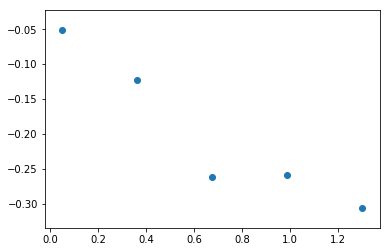

In [7]:
plt.figure()
mass1 = grouped[grouped['real_mass'] == 0.05]
plt.scatter(mass1['visual_mass'].tolist(), mass1['reward'].tolist())
#plt.gca().invert_yaxis()

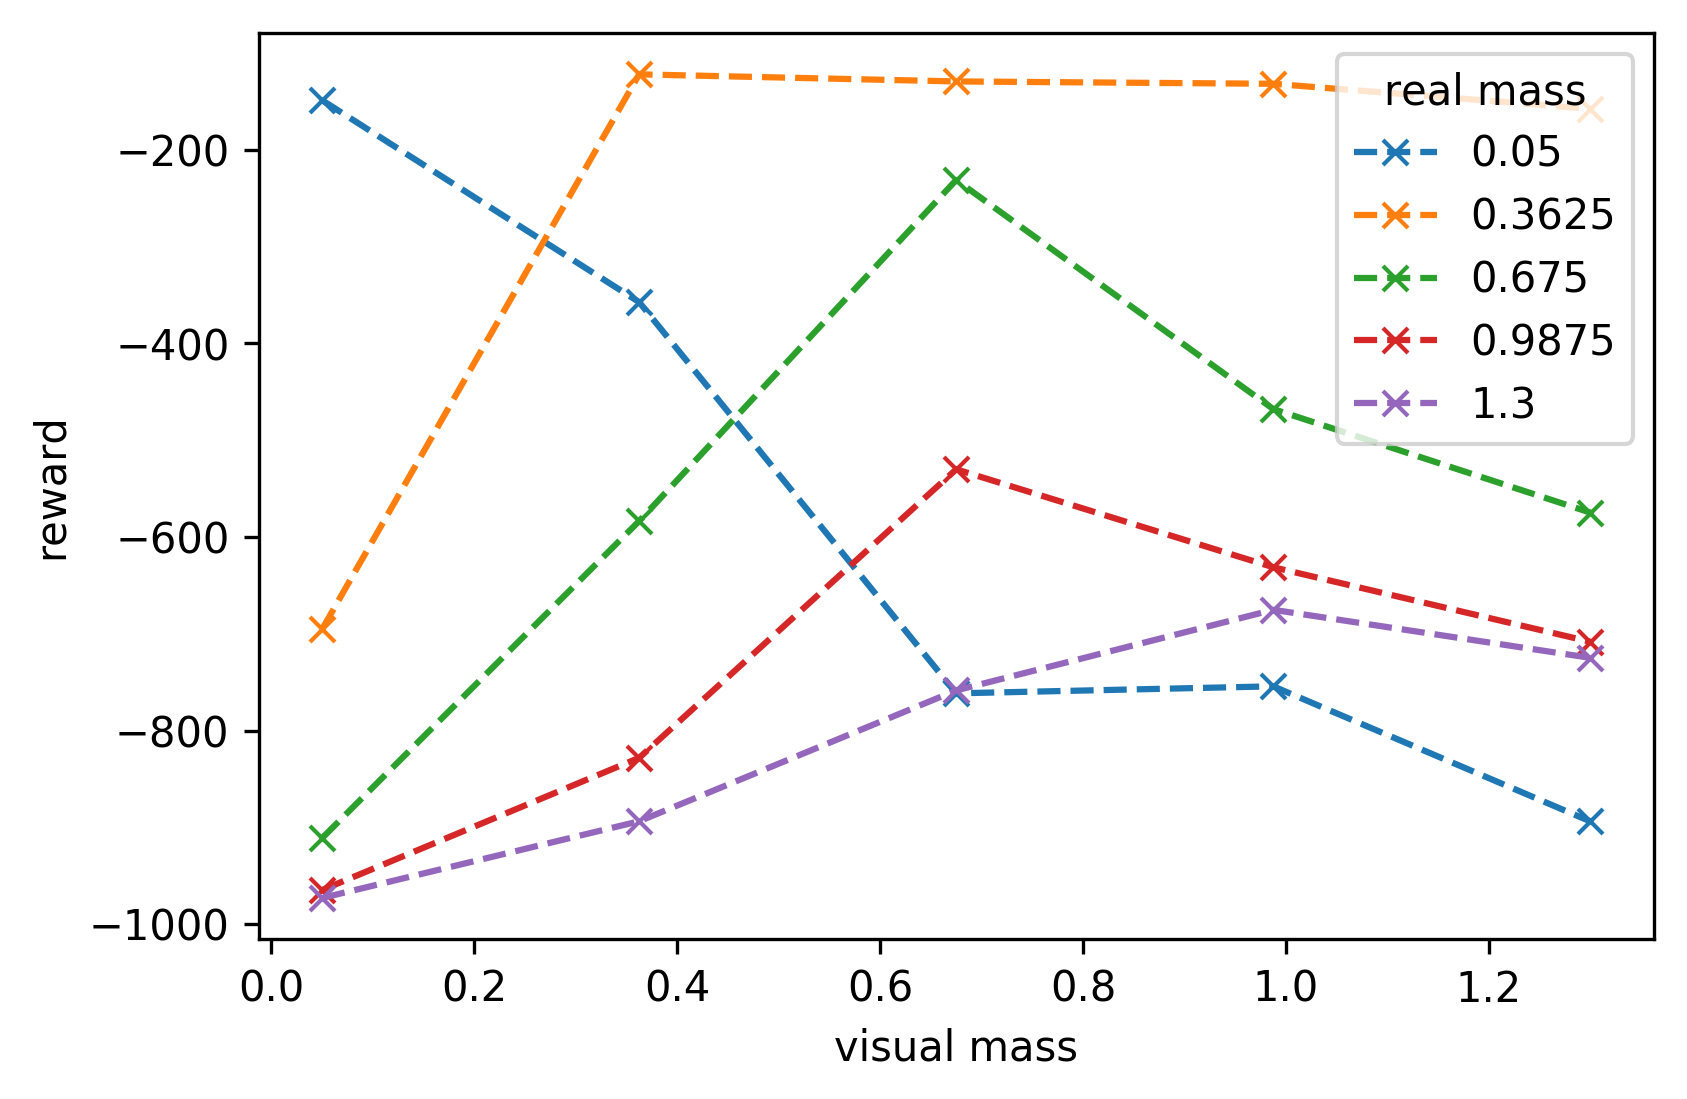

In [92]:
#sns.lmplot(data=grouped, x='visual_mass', y='reward', hue='real_mass', fit_reg=False)
col_x = 'visual_mass'
col_leg = 'real_mass'
plt.figure(dpi=300)
for val in grouped[col_leg].unique():
    sub_df = grouped[grouped[col_leg] == val]
    plt.plot(grouped[col_x].unique(), sub_df.reward['mean'], 'x--', label=val)
plt.xlabel(col_x.replace('_', ' '))
plt.ylabel('reward')
#plt.legend(title=col_leg, loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend(title=col_leg.replace('_', ' '), loc='best')
ylim = plt.ylim()

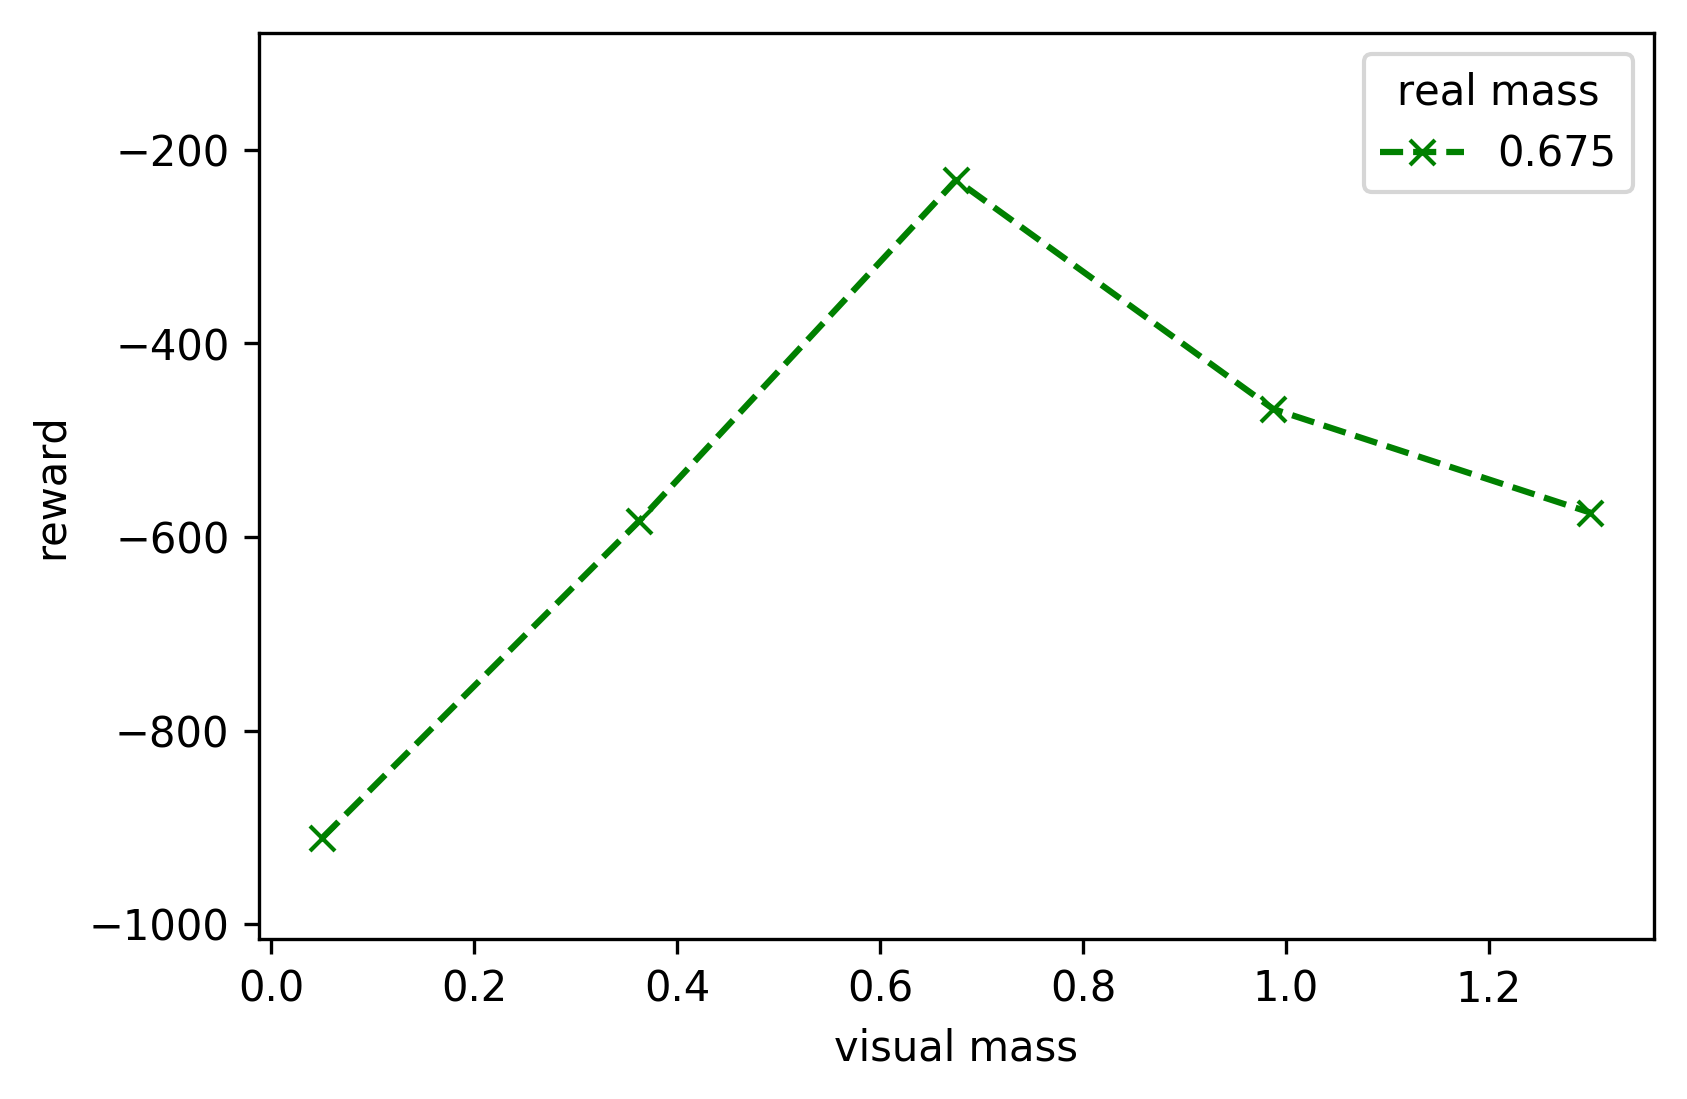

In [93]:
#sns.lmplot(data=grouped, x='visual_mass', y='reward', hue='real_mass', fit_reg=False)
col_x = 'visual_mass'
col_leg = 'real_mass'
plt.figure(dpi=300)
for val in [0.675]:
    sub_df = grouped[grouped[col_leg] == val]
    plt.plot(grouped[col_x].unique(), sub_df.reward['mean'], 'gx--', label=val)
plt.xlabel(col_x.replace('_', ' '))
plt.ylabel('reward')
plt.ylim(*ylim)
#plt.legend(title=col_leg, loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend(title=col_leg.replace('_', ' '), loc='best')

<IPython.core.display.Javascript object>


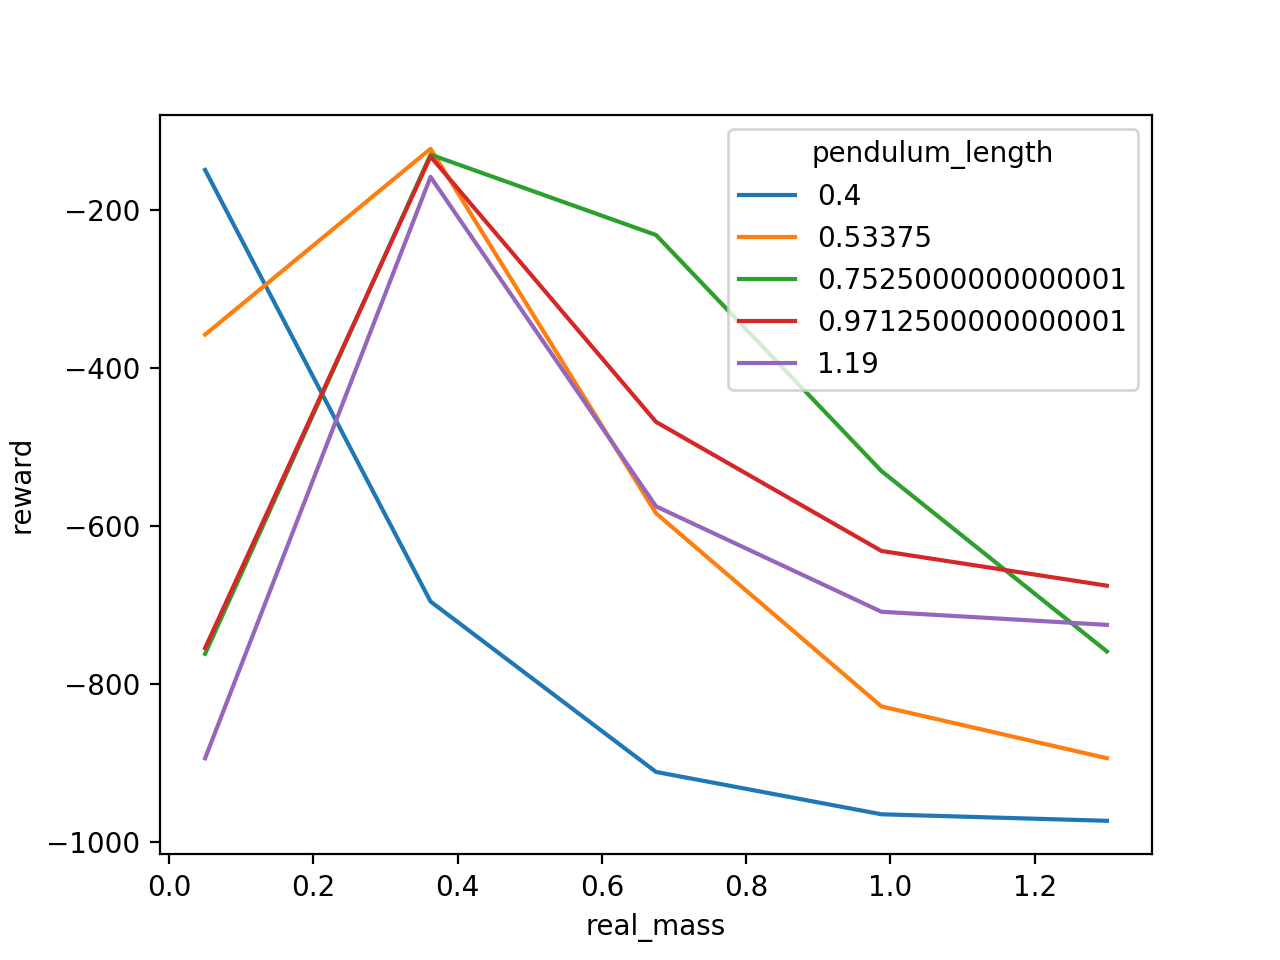

In [31]:
#sns.lmplot(data=grouped, x='visual_mass', y='reward', hue='real_mass', fit_reg=False)
col_x = 'real_mass'
col_leg = 'pendulum_length'
plt.figure()
for val in grouped[col_leg].unique():
    sub_df = grouped[grouped[col_leg] == val]
    plt.plot(grouped[col_x].unique(), sub_df.reward['mean'], label=val)
plt.xlabel(col_x)
plt.ylabel('reward')
plt.legend(title=col_leg, loc='best')

<IPython.core.display.Javascript object>


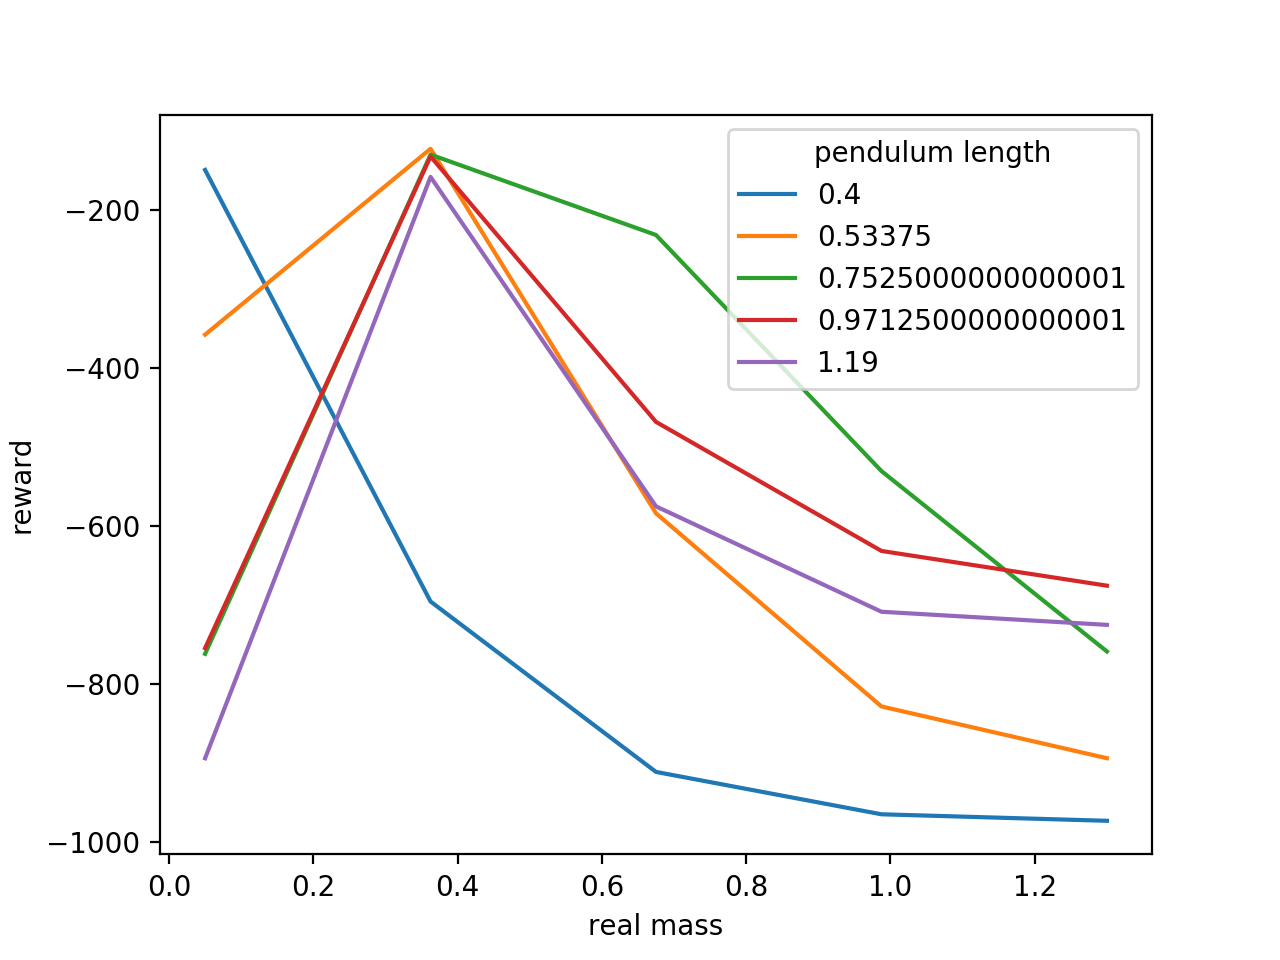

In [28]:
#sns.lmplot(data=grouped, x='visual_mass', y='reward', hue='real_mass', fit_reg=False)
plt.figure()
for length in grouped.pendulum_length.unique():
    sub_df = grouped[grouped.pendulum_length == length]
    plt.plot(grouped.real_mass.unique(), sub_df.reward['mean'], label=length)
plt.xlabel('real mass')
plt.ylabel('reward')
plt.legend(title='pendulum length', loc='best')

In [99]:
X, Y = np.meshgrid(grouped.visual_mass.unique(), grouped.real_mass.unique())
Z = np.array(grouped.reward.tolist()).reshape(5, 5)
plt.figure()
plt.

<IPython.core.display.Javascript object>


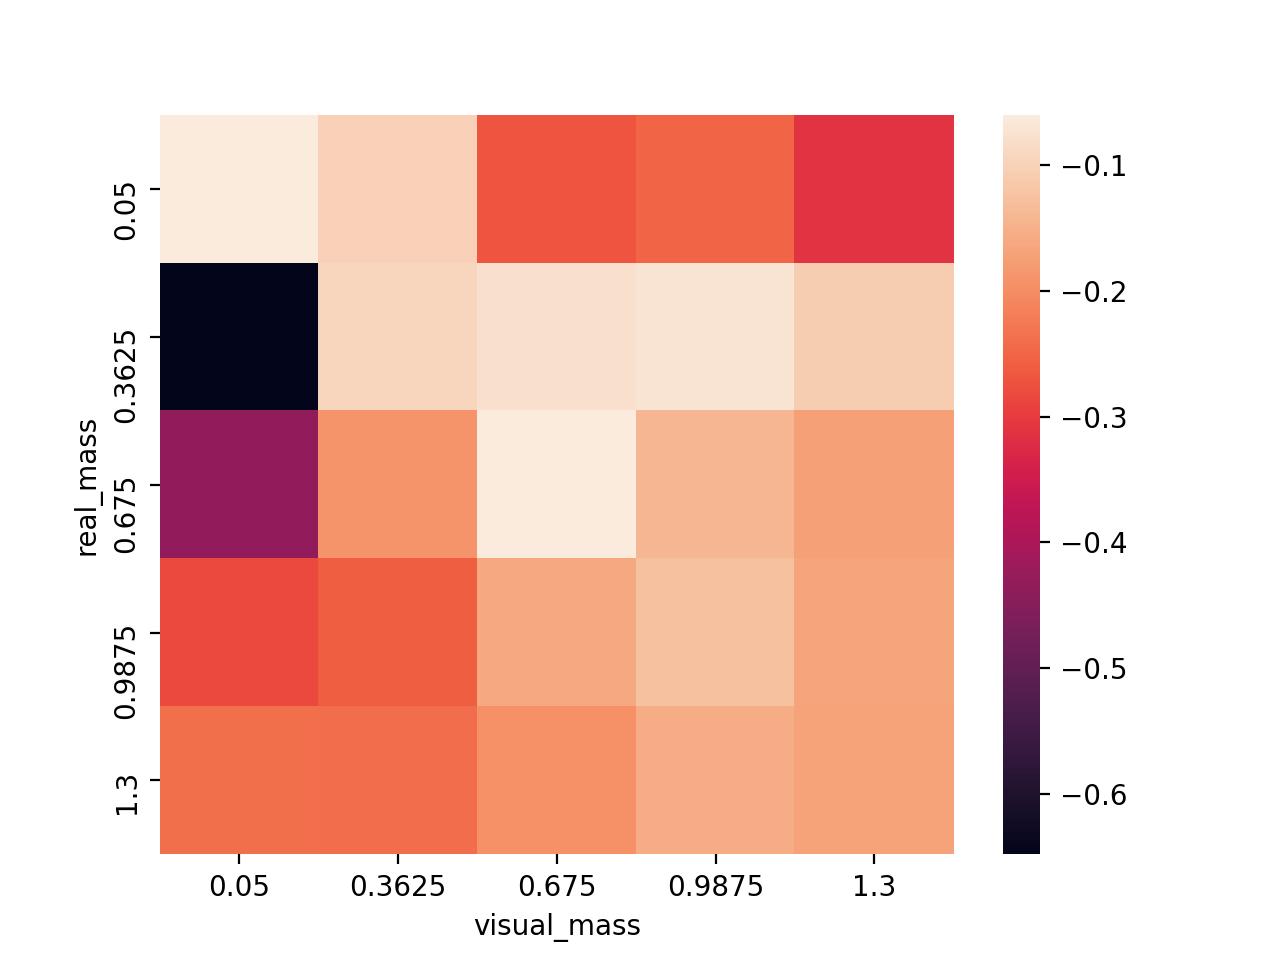

In [119]:
plt.figure()
sns.heatmap(grouped.pivot('real_mass', 'visual_mass', 'reward'), cbar=)